The sinking of the Titanic is one of the most infamous shipwrecks in history. <br/>
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.<br/>
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. <br/>
Build a predictive model that answers the question: "what sorts of people were more likely to survive?" using passenger data (ie name, age, gender, socio-economic class, etc).

'Train.csv' will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”. <br/>
The 'test.csv' dataset contains similar information but does not disclose the "ground truth" for each passenger. It's your job to predict these outcome <br/>
Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/titanic-train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Major determining factors for survival of a passenger are his Pclass and Gender.

In [5]:
data.isnull().sum().sort_index().head()

Age         177
Cabin       687
Embarked      2
Fare          0
Name          0
dtype: int64

To deal with missing data, we will remove the Cabin column entirely and impute the missing entries for Age.

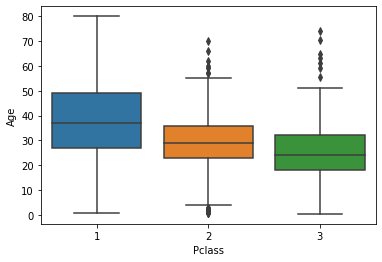

In [6]:
sns.boxplot(x='Pclass',y='Age',data=data);

We can see that the mean of passengers travelling in different Pclass is different, so we will apply a function wherein the age of missing data is the mean age of the passengers in that cabin. Also we drop the columns that won't assist the model in training.

In [7]:
data.drop('Cabin',axis=1,inplace=True)
data.dropna(inplace=True)
data = data.drop(['Name', 'Ticket'], axis=1)

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
data['Age'] = data[['Age','Pclass']].apply(impute_age, axis=1)

In [9]:
data.shape

(712, 9)

In [10]:
data.isnull().sum().sort_index().head()

Age            0
Embarked       0
Fare           0
Parch          0
PassengerId    0
dtype: int64

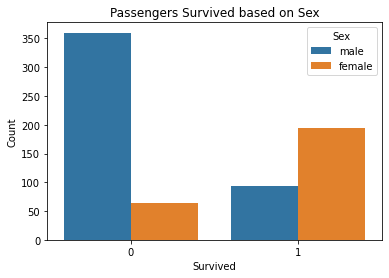

In [11]:
sns.countplot(x='Survived', hue='Sex', data=data).set(title="Passengers Survived based on Sex", ylabel="Count");

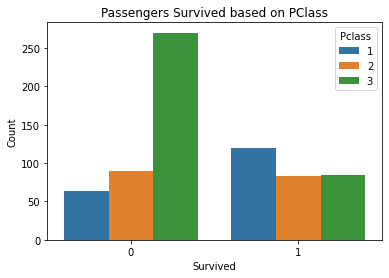

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=data).set(title="Passengers Survived based on PClass", ylabel="Count");

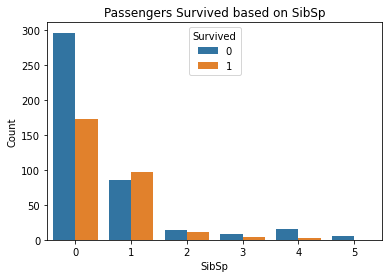

In [13]:
sns.countplot(x='SibSp',data=data, hue='Survived').set(title="Passengers Survived based on SibSp", ylabel="Count");
# siblings - spouses

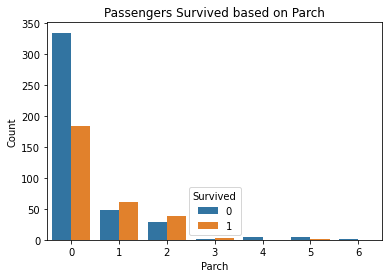

In [14]:
sns.countplot(x='Parch',data=data, hue='Survived').set(title="Passengers Survived based on Parch", ylabel="Count");
# parents - children

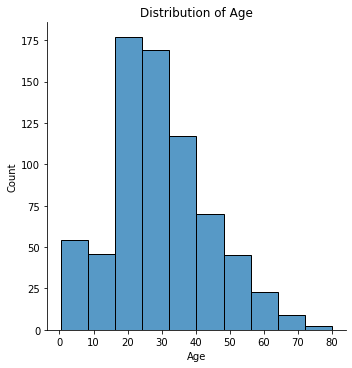

In [15]:
sns.displot(data['Age'], kde=False, bins=10).set(title="Distribution of Age");

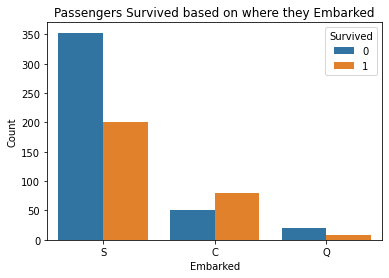

In [16]:
sns.countplot(x='Embarked',data=data, hue='Survived').set(title="Passengers Survived based on where they Embarked", ylabel="Count");
# Southhampton, Cherbourg or Queensland

In [17]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
x = data.drop(['Survived', 'PassengerId'], axis = 1)
y = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

In [20]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
predictions = logmodel.predict(x_test)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       143
           1       0.80      0.68      0.74        92

    accuracy                           0.81       235
   macro avg       0.81      0.79      0.79       235
weighted avg       0.81      0.81      0.81       235



In [23]:
print(confusion_matrix(y_test,predictions))

[[127  16]
 [ 29  63]]


In [24]:
print(accuracy_score(y_test, predictions)*100)

80.85106382978722


We get 81% accuracy for our model, now lets implement the model for the test data and predict whether the other 418 passengers on board survived.

In [25]:
test = pd.read_csv('dataset/titanic-test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
test.shape

(418, 11)

In [27]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
# test.dropna(inplace=True)
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

In [28]:
test = pd.get_dummies(test, drop_first=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [29]:
model = logmodel.predict(test.drop('PassengerId', axis=1))

In [30]:
test['Survived']=model
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1


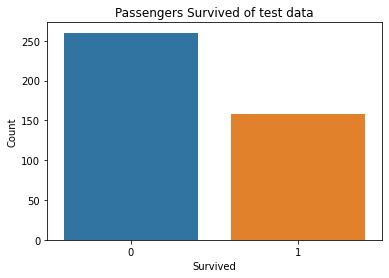

In [31]:
sns.countplot(x='Survived', data=test).set(title="Passengers Survived of test data", ylabel="Count");

In [32]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1


In [33]:
#test.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)
#test.to_csv('output.csv')

### <div style="text-align: right"> Developed & Curated by Mr. Ronik Dedhia</div>